In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.shape

(9134, 24)

In [6]:
data["Effective To Date"]

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 9134, dtype: object

In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data["effective_to_date"] = pd.to_datetime(data["effective_to_date"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [11]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


In [12]:
len(data["vehicle_size"].unique())

3

In [13]:
c = []
d = []
for i in data.columns:
    x = len(data[i].unique())
    if x < 10:
        d.append(i)
    else:
        c.append(i)

In [14]:
continuous = pd.DataFrame(data[c])

In [15]:
discrete = pd.DataFrame(data[d])

In [16]:
continuous.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [17]:
discrete.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [18]:
data = pd.set_index(data["customer"])

AttributeError: module 'pandas' has no attribute 'set_index'

In [ ]:
data = data.set_index(data['customer'])

In [ ]:
data.drop("customer", inplace = True, axis = 1)

In [19]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### plot correlation matrix

In [20]:
data.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


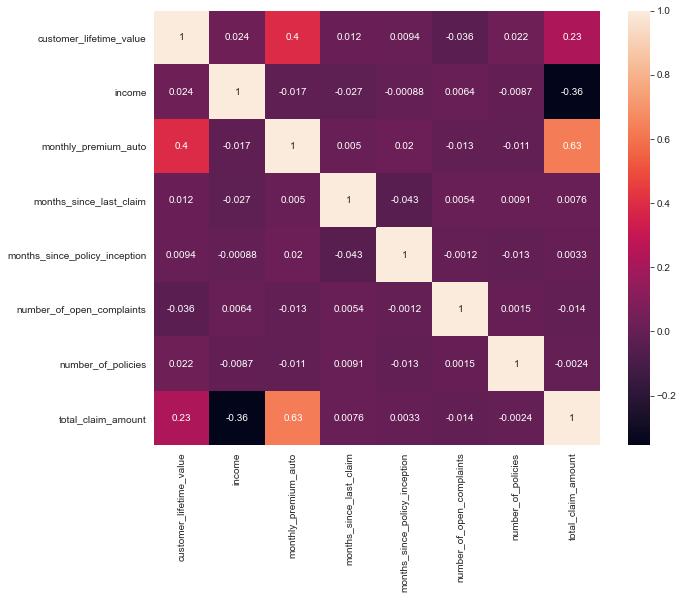

In [21]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
continuous.drop("effective_to_date", inplace = True, axis = 1)

In [40]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 428.3 KB


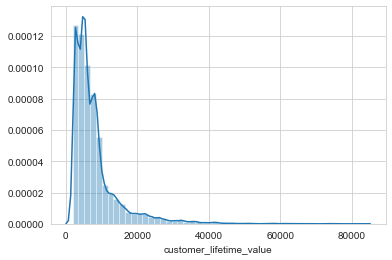

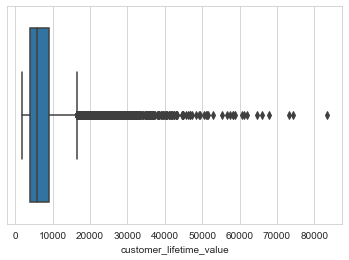

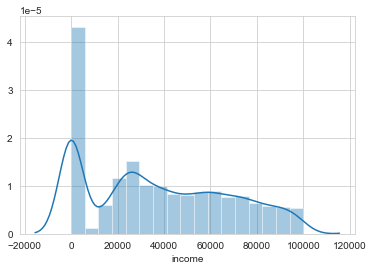

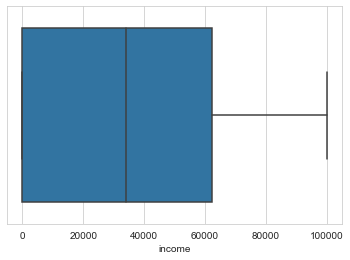

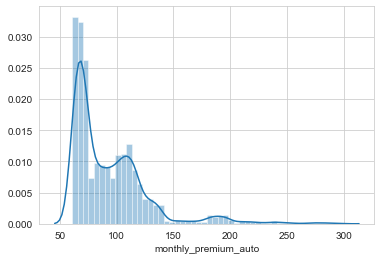

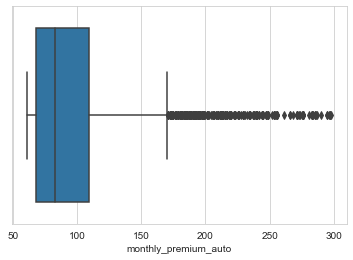

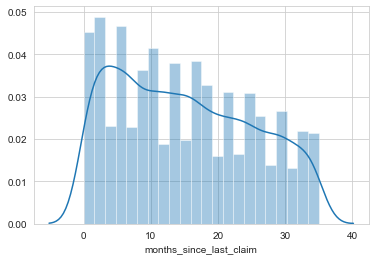

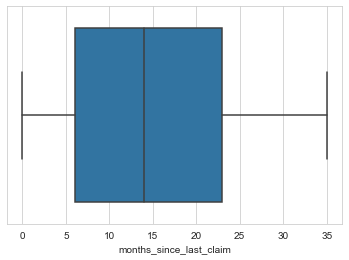

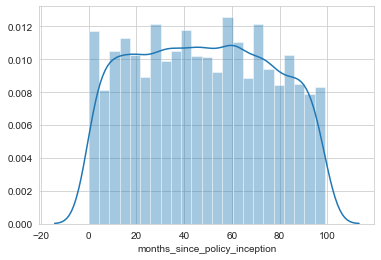

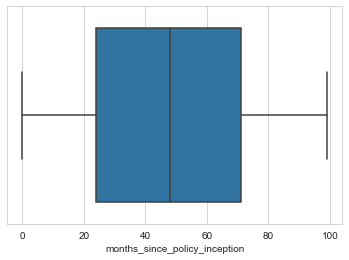

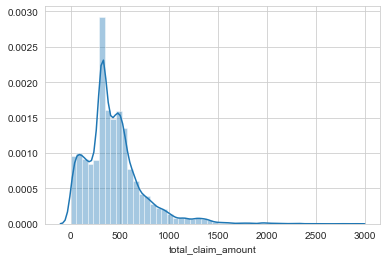

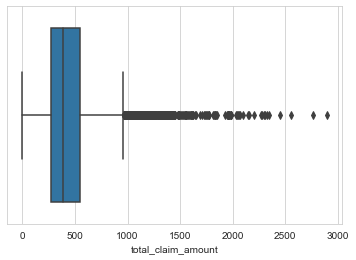

In [54]:
for i in continuous.columns:
    sns.distplot(continuous[i])
    plt.show()
    sns.boxplot(continuous[i])
    plt.show()

In [42]:
discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      9134 non-null   object
 1   response                   9134 non-null   object
 2   coverage                   9134 non-null   object
 3   education                  9134 non-null   object
 4   employmentstatus           9134 non-null   object
 5   gender                     9134 non-null   object
 6   location_code              9134 non-null   object
 7   marital_status             9134 non-null   object
 8   number_of_open_complaints  9134 non-null   int64 
 9   number_of_policies         9134 non-null   int64 
 10  policy_type                9134 non-null   object
 11  policy                     9134 non-null   object
 12  renew_offer_type           9134 non-null   object
 13  sales_channel              9134 non-null   object
 14  vehicle_

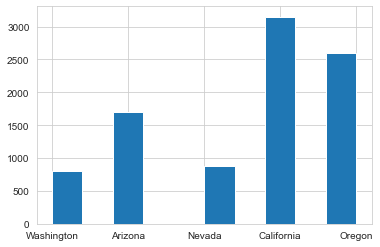

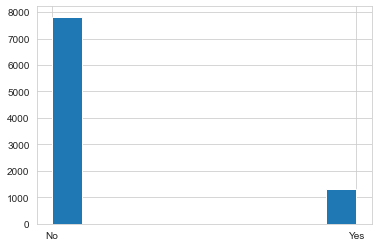

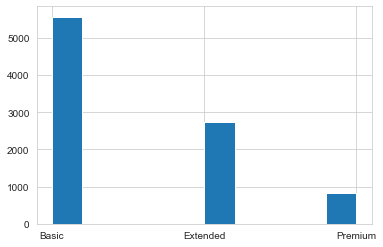

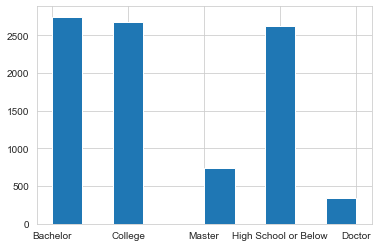

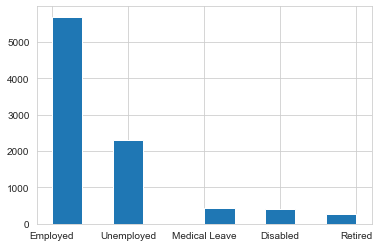

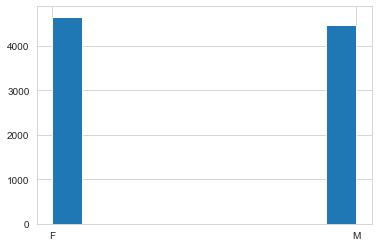

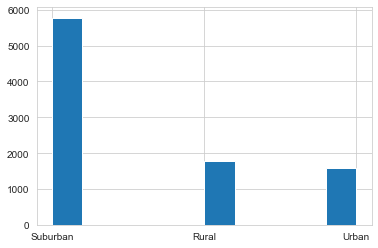

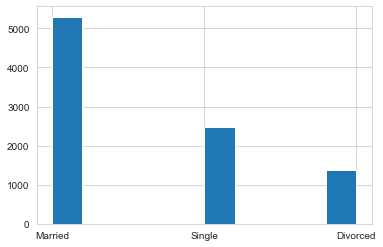

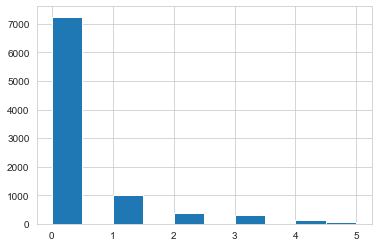

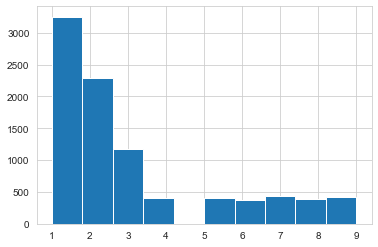

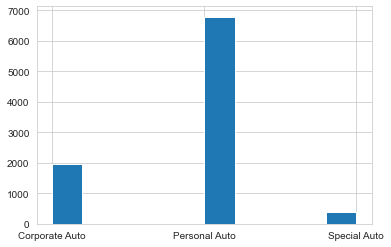

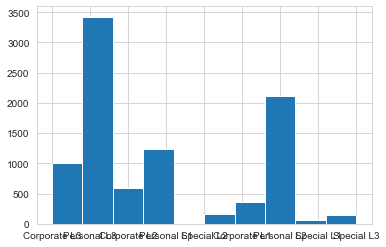

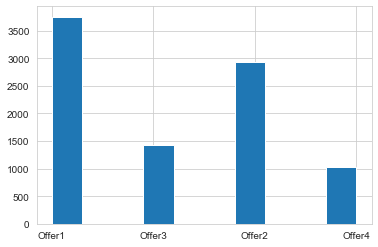

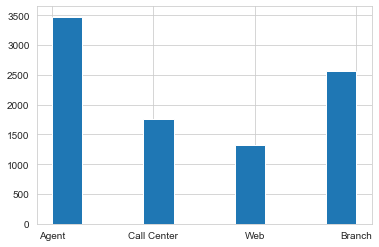

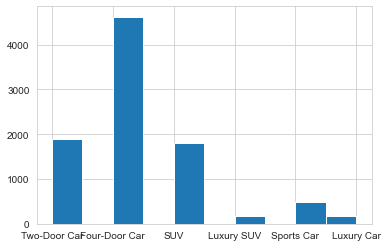

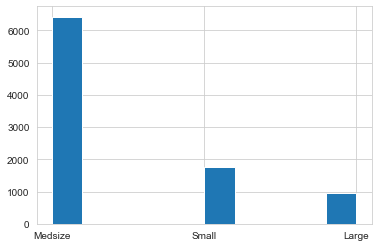

In [52]:
for i in discrete.columns:
    discrete[i].hist()
    plt.show()

In [58]:
iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25)
upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['total_claim_amount'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 960.40
The number of points outise the upper wisker is:  453


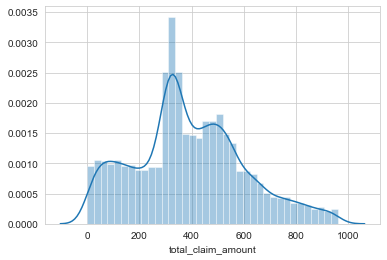

In [59]:
data = data[data['total_claim_amount'] < upper_limit]
sns.distplot(data['total_claim_amount'])
plt.show()

In [60]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['monthly_premium_auto'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 163.00
The number of points outise the upper wisker is:  207


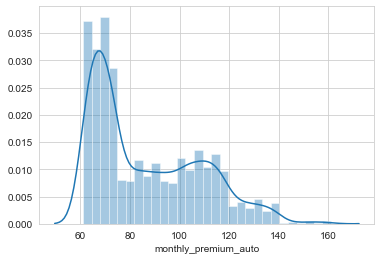

In [61]:
data = data[data['monthly_premium_auto'] < upper_limit]
sns.distplot(data['monthly_premium_auto'])
plt.show()

In [62]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['customer_lifetime_value'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 15788.66
The number of points outise the upper wisker is:  687


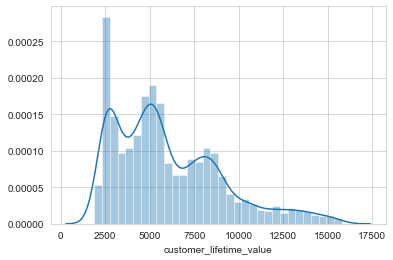

In [63]:
data = data[data['customer_lifetime_value'] < upper_limit]
sns.distplot(data['customer_lifetime_value'])
plt.show()